[
silver medal
🛰️Satellite Image Classification | CNN
](https://www.kaggle.com/code/sujithmandala/satellite-image-classification-cnn)

In [ ]:
!pip uninstall tensorflow tensorflow-probabilit

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y


In [3]:
# Option 1 (recommended):
!pip install tensorflow==2.13.0
!pip install tensorflow-probability==0.21.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 98.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found exist

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 47.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.24.0
    Uninstalling tensorflow-probability-0.24.0:
      Successfully uninstalled tensorflow-probability-0.24.0


In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

print("TensorFlow version:", tf.__version__)
print("TensorFlow Probability version:", tfp.__version__)

TensorFlow version: 2.13.0
TensorFlow Probability version: 0.21.0


In [2]:
# Create the directory in /content
!mkdir -p /content/satellite-image-classification

# Download the dataset
!curl -L -o /content/satellite-image-classification/satellite-image-classification.zip \
  https://www.kaggle.com/api/v1/datasets/download/mahmoudreda55/satellite-image-classification 2>/dev/null

# Create the target directory for unzipping
!mkdir -p /content/data

# Unzip the dataset into the specified directory quietly
!unzip -q /content/satellite-image-classification/satellite-image-classification.zip -d /content/data

In [3]:
import pandas as pd
import os

# Create an empty dataframe
data = pd.DataFrame(columns=['image_path', 'label'])

# Define the labels/classes
labels = {'/content/data/data/cloudy' : 'Cloudy',
          '/content/data/data/desert' : 'Desert',
          '/content/data/data/green_area' : 'Green_Area',
          '/content/data/data/water' : 'Water',
           }

In [4]:
import os
import pandas as pd

data_list = []  # Use a list to collect all data first

for folder in labels:
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        label = labels[folder]
        data_list.append({'image_path': image_path, 'label': label})

# Convert the list of dictionaries into a DataFrame
data = pd.DataFrame(data_list)


In [5]:
# Save the data to a CSV file
data.to_csv('image_dataset.csv', index=False)

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the dataset
df = pd.read_csv("/content/image_dataset.csv")
df

,image_path,label
0,/content/data/data/cloudy/train_11663.jpg,Cloudy
1,/content/data/data/cloudy/train_34507.jpg,Cloudy
2,/content/data/data/cloudy/train_35883.jpg,Cloudy
3,/content/data/data/cloudy/train_15137.jpg,Cloudy
4,/content/data/data/cloudy/train_1360.jpg,Cloudy
...,...,...
5626,/content/data/data/water/SeaLake_780.jpg,Water
5627,/content/data/data/water/SeaLake_1740.jpg,Water
5628,/content/data/data/water/SeaLake_685.jpg,Water
5629,/content/data/data/water/SeaLake_293.jpg,Water


In [7]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tqdm import tqdm  # For progress bar
import tensorflow as tf  # Ensure TensorFlow is imported
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
#import BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tqdm import tqdm  # For progress bar
import tensorflow as tf  # Ensure TensorFlow is imported

In [9]:
# Pre-process the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   rotation_range=20,
                                   vertical_flip=False,
                                   fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255)

# Split training data into train and validation
train_df_final, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

# Create generators
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df_final,
                                                    x_col="image_path",
                                                    y_col="label",
                                                    target_size=(128, 128),
                                                    batch_size=16,
                                                    class_mode="categorical")

val_generator = test_datagen.flow_from_dataframe(dataframe=val_df,
                                                x_col="image_path",
                                                y_col="label",
                                                target_size=(128, 128),
                                                batch_size=16,
                                                class_mode="categorical")

test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col="image_path",
                                                  y_col="label",
                                                  target_size=(128, 128),
                                                  batch_size=16,
                                                  class_mode="categorical")



Found 3603 validated image filenames belonging to 4 classes.
Found 901 validated image filenames belonging to 4 classes.
Found 1127 validated image filenames belonging to 4 classes.


# **Deep Learning Model**

In [ ]:
!pip install tqdm


Epoch 1/5


Validation Epoch 1/5: 100%|██████████| 57/57 [00:04<00:00, 13.03batch/s, Loss=1.0651, Accuracy=0.4081]


Validation Loss: 1.0651 - Validation Accuracy: 0.4081

Epoch 2/5


Validation Epoch 2/5: 100%|██████████| 57/57 [00:04<00:00, 13.57batch/s, Loss=0.4666, Accuracy=0.8320]


Validation Loss: 0.4666 - Validation Accuracy: 0.8320

Epoch 3/5


Validation Epoch 3/5: 100%|██████████| 57/57 [00:04<00:00, 13.28batch/s, Loss=0.7236, Accuracy=0.6673]


Validation Loss: 0.7236 - Validation Accuracy: 0.6673

Epoch 4/5


Validation Epoch 4/5: 100%|██████████| 57/57 [00:04<00:00, 14.11batch/s, Loss=0.3754, Accuracy=0.8333]


Validation Loss: 0.3754 - Validation Accuracy: 0.8333

Epoch 5/5


Validation Epoch 5/5: 100%|██████████| 57/57 [00:04<00:00, 13.76batch/s, Loss=0.3248, Accuracy=0.8772]


Validation Loss: 0.3248 - Validation Accuracy: 0.8772


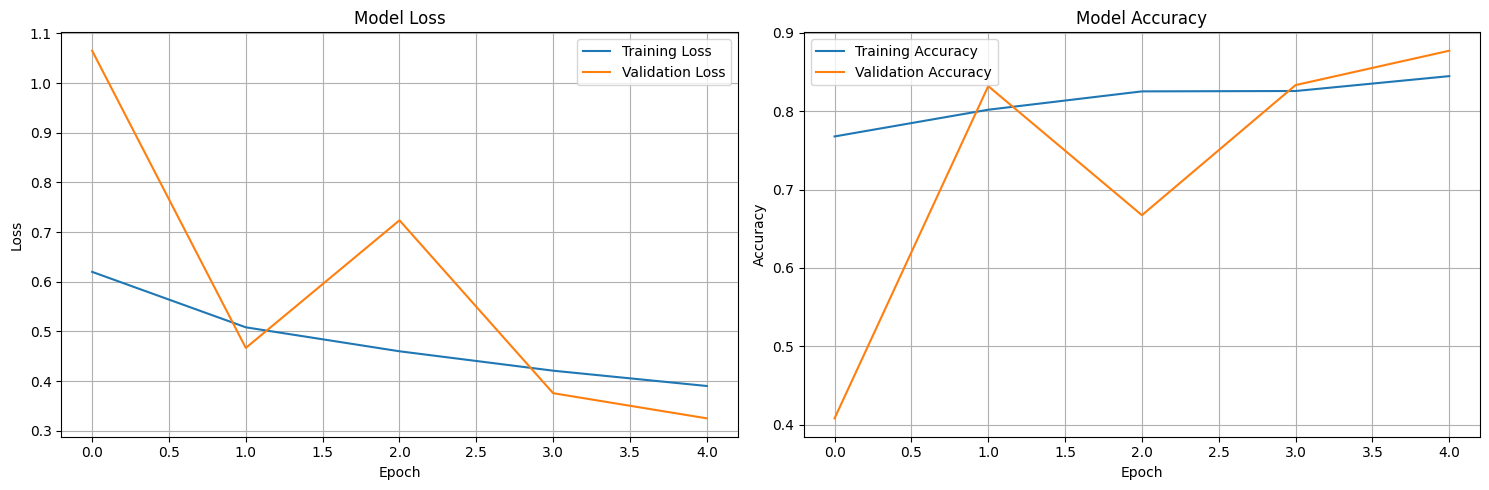


Model Evaluation:

Performing Monte Carlo Dropout predictions...

Performing Monte Carlo Dropout with 50 samples


Sampling Progress: 100%|██████████| 50/50 [00:04<00:00, 10.74sample/s]


71/71 [==============================] - 5s 68ms/step


In [ ]:
# Step 2: Define the Bayesian CNN Model with Dropout
def create_bayesian_cnn():
    # Explicitly set policy to float32
    tf.keras.mixed_precision.set_global_policy('float32')

    model = Sequential()

    # First block - with proper initialization and regularization
    model.add(Conv2D(16, (3, 3), input_shape=(128, 128, 3), padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.1))

    # Second block
    model.add(Conv2D(32, (3, 3), padding='same',
                     kernel_initializer='glorot_uniform',
                     kernel_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.2))

    # Dense layers with proper initialization
    model.add(Flatten())
    model.add(Dense(32, kernel_initializer='glorot_uniform',
                   kernel_regularizer=tf.keras.regularizers.l2(1e-6)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.3))
    # Final layer with proper initialization
    model.add(Dense(4, activation='softmax',
                   kernel_initializer='glorot_uniform',
                   bias_initializer='zeros'))

    def proper_categorical_crossentropy(y_true, y_pred):
        # Ensure numerical stability
        epsilon = 1e-7
        y_pred = tf.clip_by_value(y_pred, epsilon, 1 - epsilon)

        # Basic categorical crossentropy
        ce_loss = tf.keras.losses.categorical_crossentropy(
            y_true, y_pred,
            from_logits=False
        )

        # Average the loss
        ce_loss = tf.reduce_mean(ce_loss)

        # Add small L2 regularization
        l2_loss = sum(tf.nn.l2_loss(v) for v in model.trainable_variables
                     if 'kernel' in v.name) * 1e-4

        return ce_loss + l2_loss

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.001,
        weight_decay=1e-4
    )

    model.compile(
        optimizer=optimizer,
        loss=proper_categorical_crossentropy,
        metrics=['accuracy']
    )

    return model

# Ensure data normalization
def normalize_data(images):
    return images / 255.0

# Step 3: Define ELBO Loss and KL Divergence
def elbo_loss(log_likelihood, kl_divergence, beta=0.1):
    """Computes the normalized ELBO loss."""
    # Convert all inputs to float32
    log_likelihood = tf.cast(log_likelihood, tf.float32)
    kl_divergence = tf.cast(kl_divergence, tf.float32)
    beta = tf.cast(beta, tf.float32)

    batch_size = tf.cast(tf.shape(log_likelihood)[0], tf.float32)

    # Ensure proper scaling
    normalized_ll = tf.reduce_mean(log_likelihood)
    normalized_kl = kl_divergence / batch_size

    # Combine the terms
    elbo = normalized_ll + (beta * normalized_kl)

    # Ensure the loss is positive and properly scaled
    return tf.abs(elbo) / batch_size

def compute_kl_divergence(model, input_tensor):
    """Computes the KL divergence for the model."""
    kl_loss = tf.constant(0.0, dtype=tf.float32)

    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Dense):
            weights = tf.cast(layer.kernel, tf.float32)

            # Calculate mean and variance using tf operations
            mean = tf.reduce_mean(weights)
            variance = tf.reduce_mean(tf.square(weights - mean))

            # Standard KL divergence calculation
            kl_loss += 0.5 * tf.reduce_sum(
                tf.math.log(1.0) - tf.math.log(variance + 1e-10) +
                variance + tf.square(mean) - 1.0
            )

    return kl_loss
from tqdm import tqdm  # For progress bar
import tensorflow as tf  # Ensure TensorFlow is imported

from tqdm import tqdm  # For progress bar
import tensorflow as tf  # Ensure TensorFlow is imported

# Add tf.data optimization
def prepare_dataset(generator, batch_size=16):
    return tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None, 128, 128, 3], [None, 4])
    ).prefetch(tf.data.AUTOTUNE).cache()

# Step 4: Train the Model with ELBO Loss and Progress Tracking
def train_bayesian_model(model, train_generator, val_generator, epochs=5, beta=0.1):
    history = {
        'loss': [],
        'accuracy': [],
        'val_loss': [],
        'val_accuracy': []
    }

    @tf.function
    def train_step(images, labels):
        with tf.GradientTape() as tape:
            outputs = model(images, training=True)
            ce_loss = tf.keras.losses.categorical_crossentropy(labels, outputs, from_logits=False)
            ce_loss = tf.reduce_mean(ce_loss)
            kl_div = compute_kl_divergence(model, images) * 1e-4
            loss = ce_loss + kl_div

        gradients = tape.gradient(loss, model.trainable_variables)
        model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        return loss, outputs

    for epoch in range(epochs):
        train_losses = []
        train_accuracies = []
        val_losses = []
        val_accuracies = []

        print(f"\nEpoch {epoch + 1}/{epochs}")
        train_generator.reset()

        with tqdm(total=len(train_generator), desc=f"Epoch {epoch + 1}/{epochs}", unit="batch") as pbar:
            for batch_idx, (images, labels) in enumerate(train_generator):
                loss, outputs = train_step(images, labels)
                accuracy = tf.reduce_mean(
                    tf.cast(
                        tf.equal(
                            tf.argmax(labels, axis=1),
                            tf.argmax(outputs, axis=1)
                        ),
                        tf.float32
                    )
                )

                batch_loss = float(tf.reduce_mean(loss))
                batch_accuracy = float(accuracy)
                train_losses.append(batch_loss)
                train_accuracies.append(batch_accuracy)

                pbar.set_postfix({
                    'Loss': f'{np.mean(train_losses):.4f}',
                    'Accuracy': f'{np.mean(train_accuracies):.4f}',
                    'Batch Loss': f'{batch_loss:.4f}',
                    'Batch Acc': f'{batch_accuracy:.4f}'
                })
                pbar.update(1)

                if batch_idx + 1 >= len(train_generator):
                    break

        val_generator.reset()
        with tqdm(total=len(val_generator), desc=f"Validation Epoch {epoch + 1}/{epochs}", unit="batch") as pbar_val:
            for batch_idx, (images, labels) in enumerate(val_generator):
                val_outputs = model(images, training=False)
                val_loss = tf.reduce_mean(
                    tf.keras.losses.categorical_crossentropy(
                        labels, val_outputs,
                        from_logits=False
                    )
                )
                val_accuracy = tf.reduce_mean(
                    tf.cast(
                        tf.equal(
                            tf.argmax(labels, axis=1),
                            tf.argmax(val_outputs, axis=1)
                        ),
                        tf.float32
                    )
                )
                val_losses.append(float(val_loss))
                val_accuracies.append(float(val_accuracy))

                pbar_val.set_postfix({
                    'Loss': f'{np.mean(val_losses):.4f}',
                    'Accuracy': f'{np.mean(val_accuracies):.4f}'
                })
                pbar_val.update(1)

                if batch_idx + 1 >= len(val_generator):
                    break

        history['loss'].append(np.mean(train_losses))
        history['accuracy'].append(np.mean(train_accuracies))
        history['val_loss'].append(np.mean(val_losses))
        history['val_accuracy'].append(np.mean(val_accuracies))

        # Print validation results for each epoch
        print(f"Validation Loss: {history['val_loss'][-1]:.4f} - Validation Accuracy: {history['val_accuracy'][-1]:.4f}")

    return history

# After training, plot final results
def plot_final_results(history):
    """Plot final training results in a single figure."""
    plt.figure(figsize=(15, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

# Step 5: Monte Carlo Dropout with Progress Tracking
def monte_carlo_dropout(model, inputs, num_samples=10):
    """Performs Monte Carlo Dropout prediction."""
    predictions = []

    print(f"\nPerforming Monte Carlo Dropout with {num_samples} samples")
    with tqdm(total=num_samples, desc="Sampling Progress", unit="sample") as pbar:
        for _ in range(num_samples):
            # Enable dropout during inference
            pred = model(inputs, training=True)
            predictions.append(pred.numpy())
            pbar.update(1)

    predictions = np.array(predictions)
    mean_prediction = np.mean(predictions, axis=0)
    uncertainty = np.var(predictions, axis=0)

    return mean_prediction, uncertainty

# Add evaluation function
def evaluate_model(model, test_generator):
    print("\nModel Evaluation:")
    print("=" * 50)

    # Get predictions with Monte Carlo Dropout
    print("\nPerforming Monte Carlo Dropout predictions...")
    test_images = next(test_generator)[0]  # Get a batch of test images
    mean_pred, uncertainty = monte_carlo_dropout(model, test_images, num_samples=50)

    # Evaluate model
    test_loss, test_accuracy = model.evaluate(test_generator, verbose=0)

    # Get predictions
    y_pred = model.predict(test_generator)
    y_true = np.concatenate([y for _, y in test_generator], axis=0)

    # Calculate metrics
    from sklearn.metrics import classification_report, confusion_matrix
    print("\nDetailed Classification Report:")
    print("-" * 50)
    print(classification_report(np.argmax(y_true, axis=1),
                              np.argmax(y_pred, axis=1)))

    print("\nConfusion Matrix:")
    print("-" * 50)
    conf_matrix = confusion_matrix(np.argmax(y_true, axis=1),
                                 np.argmax(y_pred, axis=1))
    print(conf_matrix)

    print("\nModel Performance Metrics:")
    print("-" * 50)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Calculate uncertainty metrics
    mean_uncertainty = np.mean(uncertainty)
    max_uncertainty = np.max(uncertainty)
    print(f"\nUncertainty Metrics:")
    print("-" * 50)
    print(f"Mean Prediction Uncertainty: {mean_uncertainty:.4f}")
    print(f"Max Prediction Uncertainty: {max_uncertainty:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()

    # Plot uncertainty distribution
    plt.figure(figsize=(10, 6))
    plt.hist(uncertainty.flatten(), bins=50)
    plt.title('Prediction Uncertainty Distribution')
    plt.xlabel('Uncertainty')
    plt.ylabel('Count')
    plt.savefig('uncertainty_distribution.png')
    plt.show()

    return {
        'test_loss': test_loss,
        'test_accuracy': test_accuracy,
        'mean_uncertainty': mean_uncertainty,
        'max_uncertainty': max_uncertainty,
        'confusion_matrix': conf_matrix,
        'predictions': y_pred,
        'uncertainty': uncertainty
    }

# Step 6: Start Training
# Create the model
model = create_bayesian_cnn()

# Train the model with the Bayesian ELBO loss
history = train_bayesian_model(model, train_generator, val_generator, epochs=5, beta=0.1)
plot_final_results(history)

# Evaluate the model
evaluation_results = evaluate_model(model, test_generator)
import tensorflow_probability as tfp

def create_bayesian_cnn():
    model = Sequential([
        # First block
        Conv2D(64, (3, 3), padding='same', input_shape=(128, 128, 3),
               kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(64, (3, 3), padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Second block
        Conv2D(128, (3, 3), padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(128, (3, 3), padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.3),

        # Third block
        Conv2D(256, (3, 3), padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        BatchNormalization(),
        Activation('relu'),
        Conv2D(256, (3, 3), padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.4),

        # Bayesian Dense layers
        Flatten(),
        tfp.layers.DenseFlipout(512, kernel_divergence_fn=tfp.layers.default_multivariate_normal_fn,
                                activation='relu'),
        Dropout(0.5),
        Dense(4, activation='softmax')
    ])

    optimizer = tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        weight_decay=1e-5
    )

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy']
    )

    return model



